In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('data.csv',encoding='unicode_escape')
# Reading the dataset

C:\Users\UMAIR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
file = open("Descriptionfile.txt","r")
for i in file.readlines():
    print(i)

Aim

To do data analysis on India Air Quality data and predict tha value of Air Quality Index based on given features of concentration of sulphur dioxide,nitrogen dioxide, respirable suspended particualte matter, suspended particulate matter and classify the Air Quality as good, moderate, poor, unhealthy, healthy.



The data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP) year 1990-2015



The columns are



stn_code (station code)

sampling_date (date of sample collection)

state (Indian State)

location (location of sample collection)

agency

type (type of area)

so2 (sulphur dioxide concentration)

no2 (nitrogen dioxide concentration)

rspm (respirable suspended particualte matter concentration)

spm (suspended particulate matter)

location_monitoring_sta

In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
df.shape

(435742, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [8]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [9]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [10]:
df.columns 

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

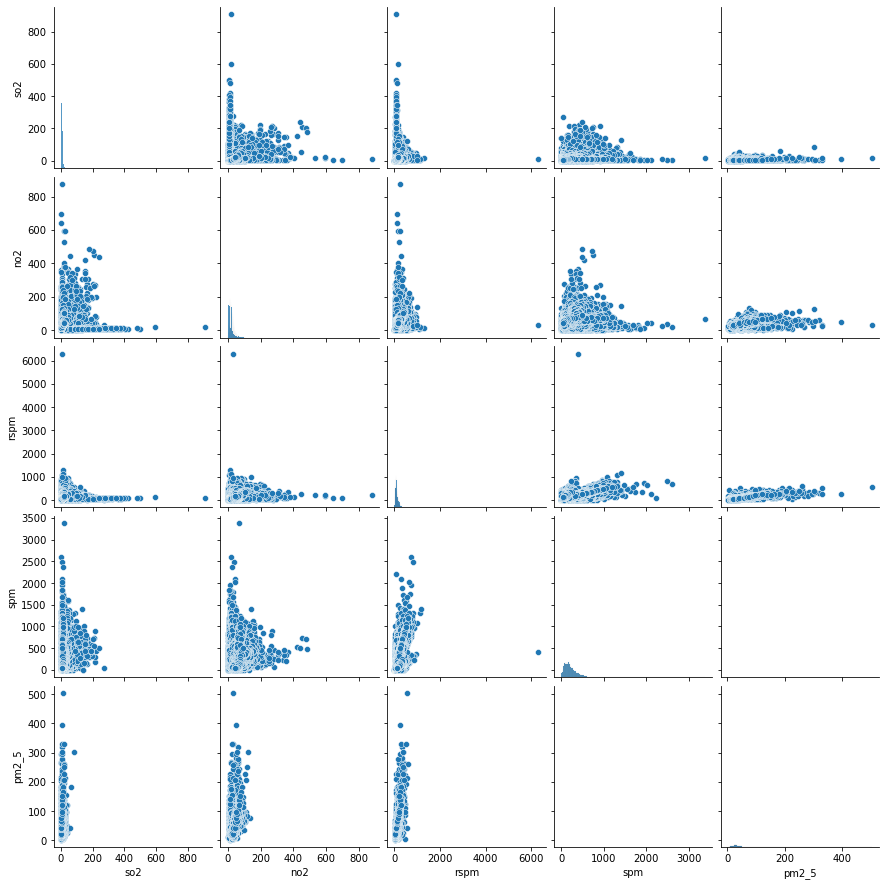

In [11]:
sns.pairplot(data=df)

In [12]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

Text(0, 0.5, 'Frequencies')

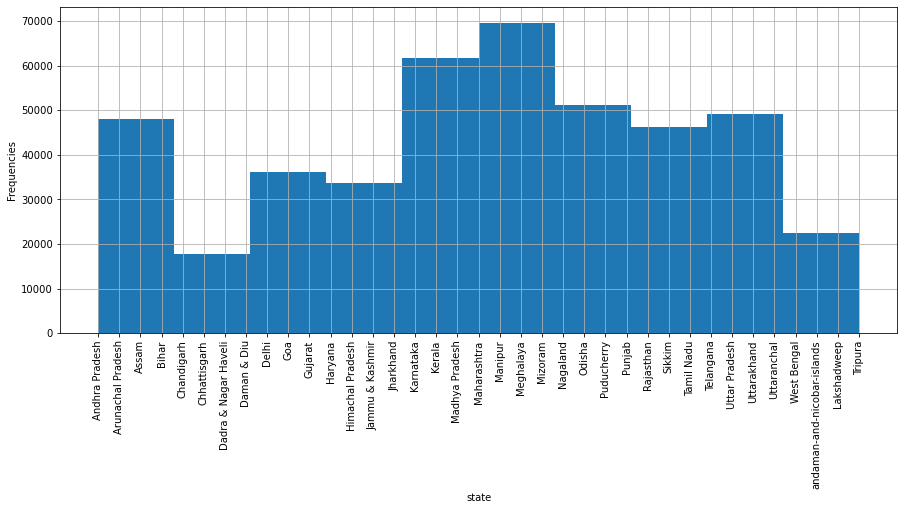

In [13]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist().plot()
plt.xlabel('state')
plt.ylabel('Frequencies')

In [14]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

Text(0, 0.5, 'Frequencies')

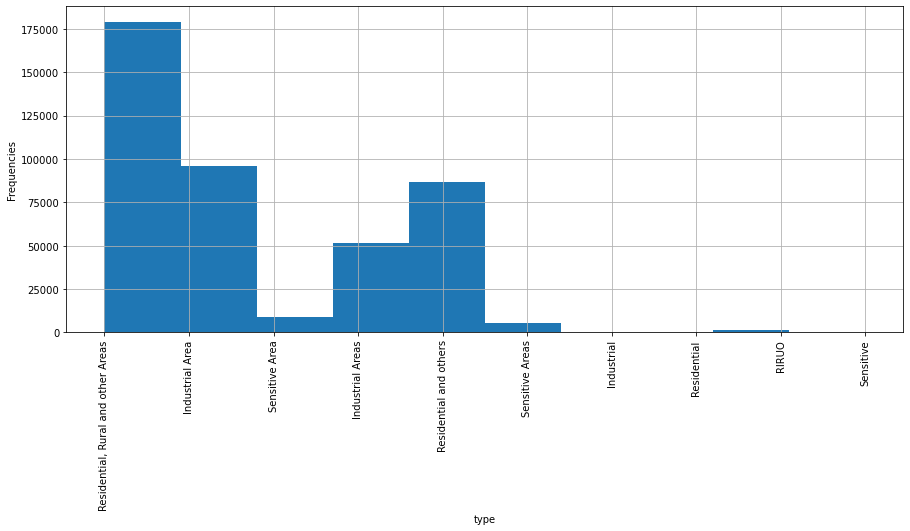

In [15]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist().plot()
plt.xlabel('type')
plt.ylabel('Frequencies')

In [16]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

Text(0, 0.5, 'Frequencies')

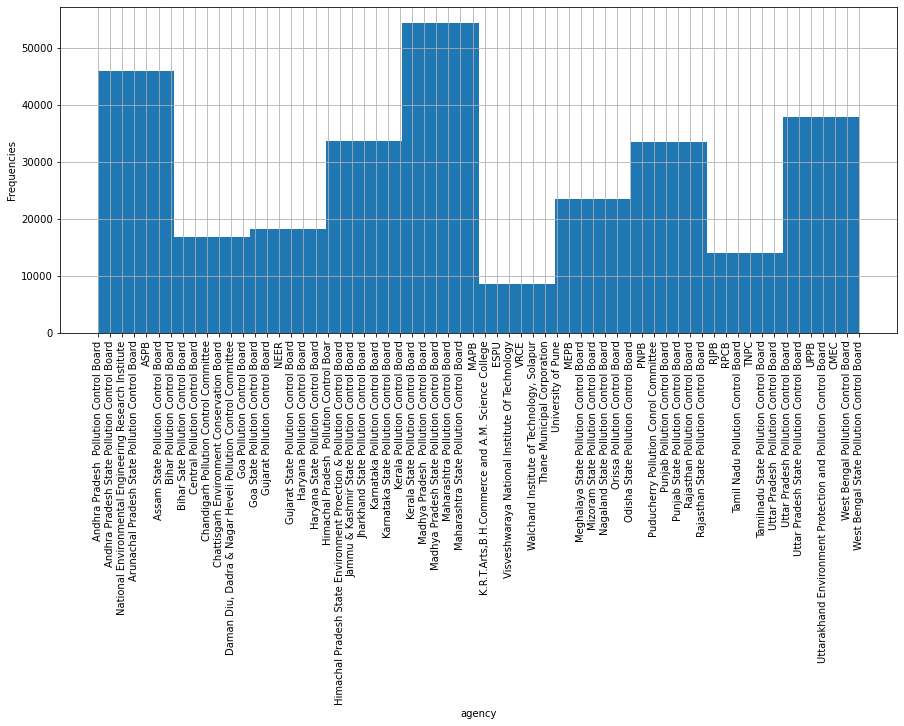

In [17]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist().plot()
plt.xlabel('agency')
plt.ylabel('Frequencies')

In [18]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

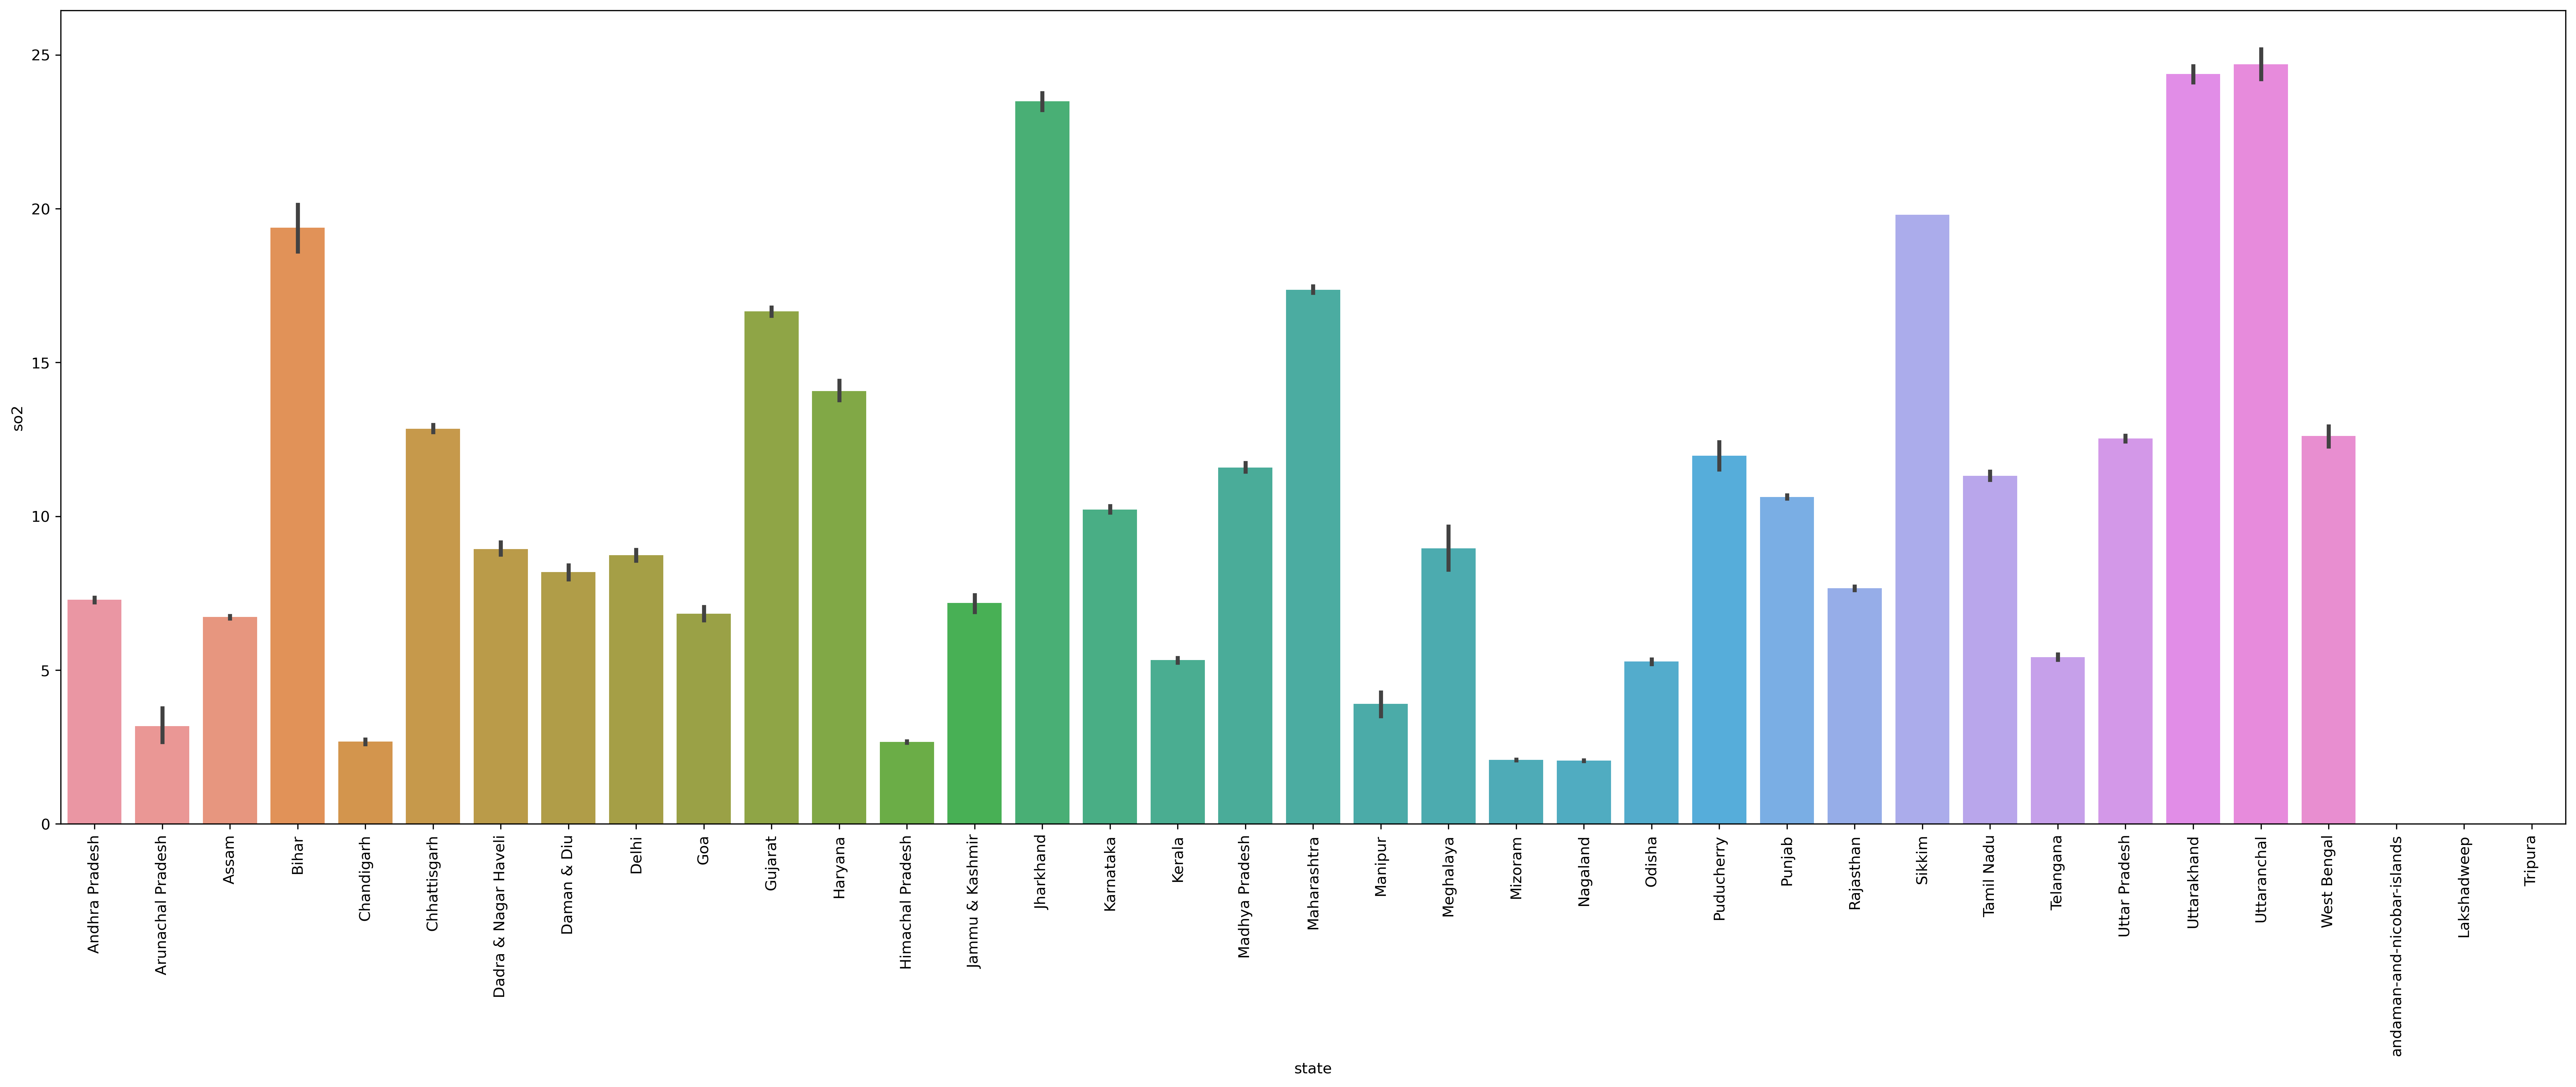

In [19]:
plt.figure(figsize=(30, 10),dpi=300)
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

<AxesSubplot:xlabel='state'>

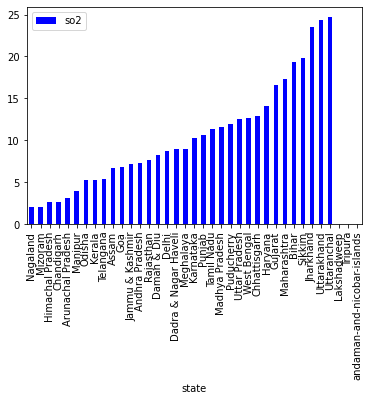

In [20]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='blue')

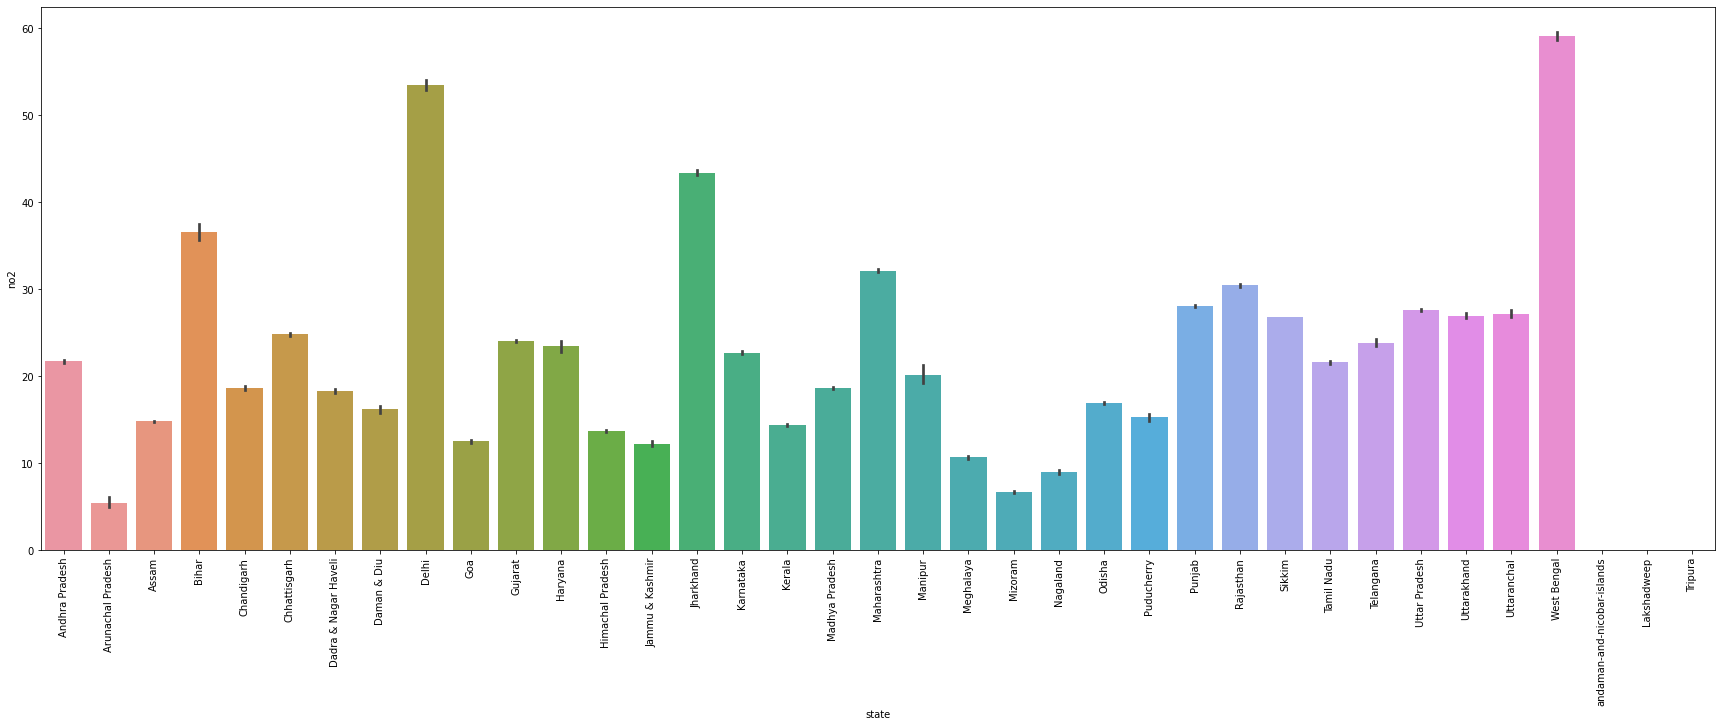

In [21]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states 

<AxesSubplot:xlabel='state'>

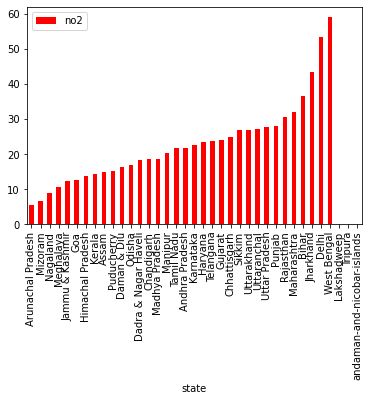

In [22]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='red')

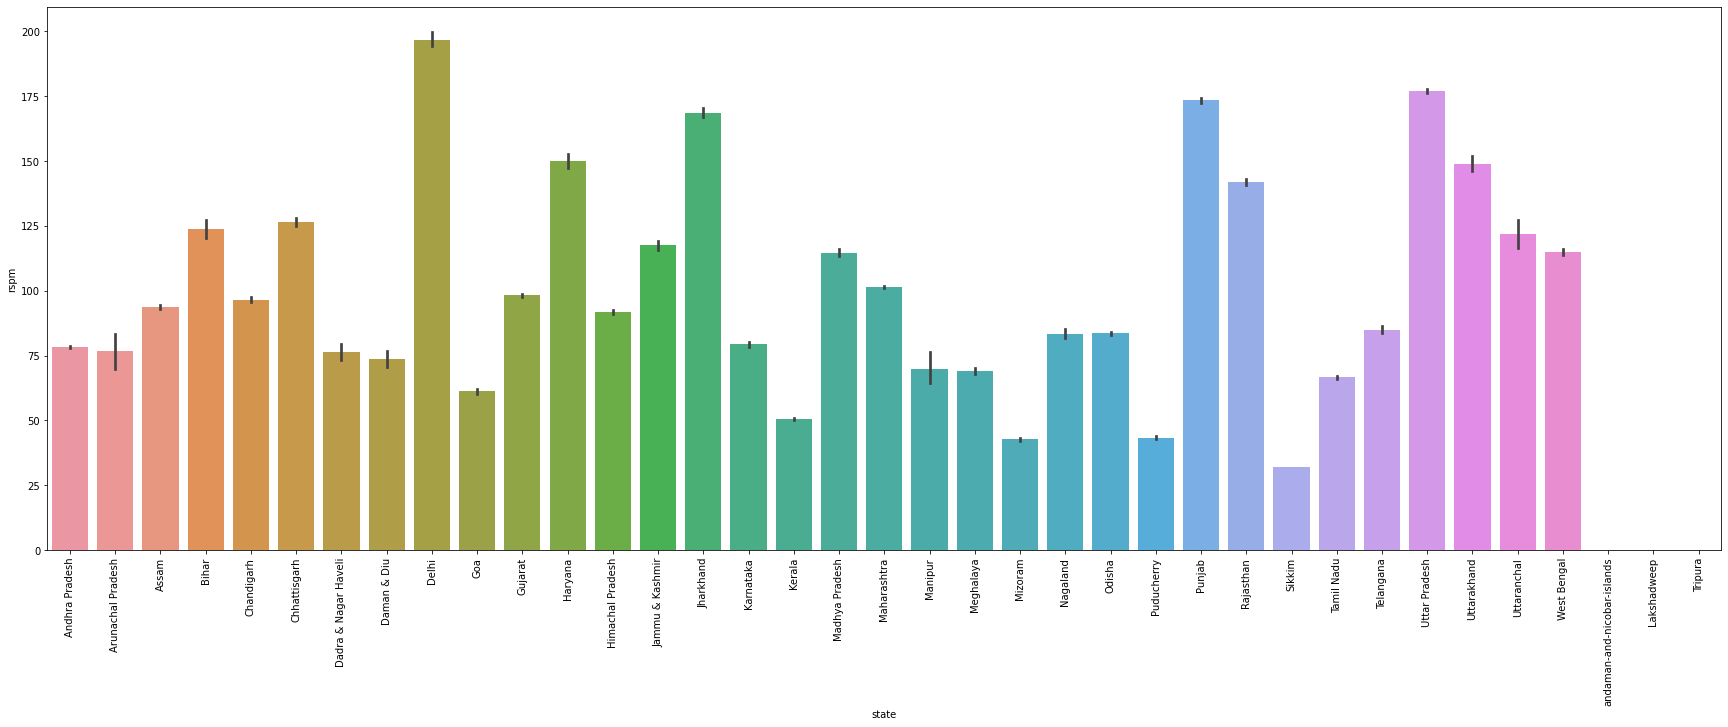

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states 

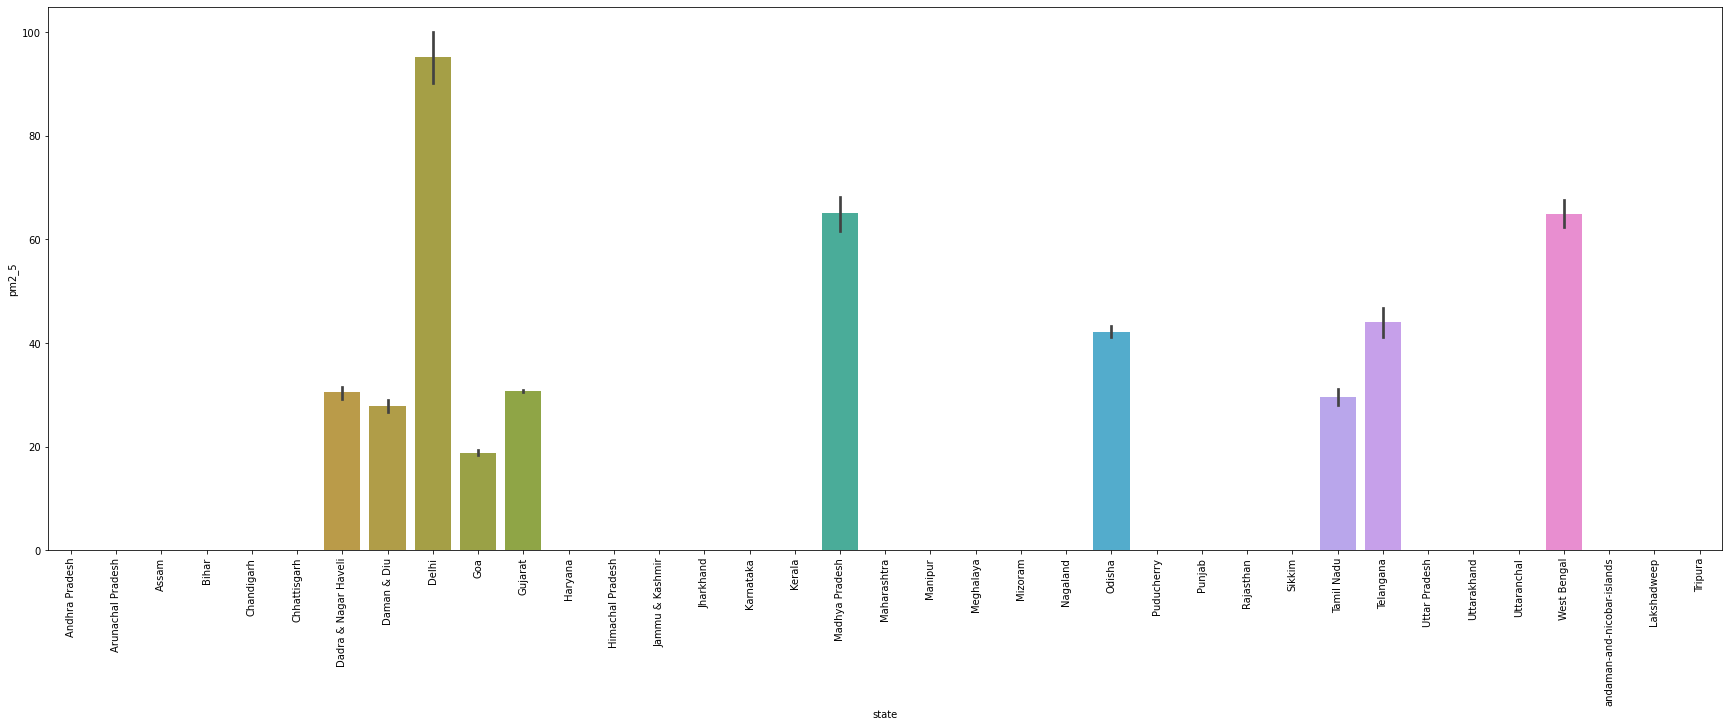

In [24]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states 

In [25]:
df.isnull().sum().sort_values(ascending=False)

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
location                            3
sampling_date                       3
state                               0
dtype: int64

In [26]:
(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)  

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
location                        0.000688
sampling_date                   0.000688
state                           0.000000
dtype: float64

In [27]:
df = df.drop(["agency","stn_code","sampling_date","location_monitoring_station","date"],axis=1)

In [28]:
(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) #null values in %

pm2_5       97.862497
spm         54.478797
rspm         9.230692
so2          7.951035
no2          3.725370
type         1.237659
location     0.000688
state        0.000000
dtype: float64

In [29]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [30]:
df.fillna(0, inplace=True)

In [31]:
 df.isnull().sum()
# Now we have successfully removed null values

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

### CALCULATE AIR QUALITY INDEX FOR SO2

In [32]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


## no2 individual pollutant index(ni)

In [33]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
#no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### rspm individual pollutant index(rpi)

In [34]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### spm individual pollutant index(spi)

In [42]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
#spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


 ### function to calculate the air quality index (AQI) of every data value

In [44]:
#checking the greatest value and assigning to AQI
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [48]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [49]:
df["AQI_Range"].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

In [51]:
X = df[["so2","no2","rspm","spm","pm2_5","SOi","Noi","Rpi","SPMi"]]
y = df["AQI"]

In [52]:
X.head()

,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

## Models

In [58]:
LR = LinearRegression()
LR.fit(X_train,y_train)

#predicting train
train_pred= LR.predict(X_train)
#predicting on test
test_pred= LR.predict(X_test)


RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Score value on train:',LR.score(X_train, y_train))
print('Score value on test:',LR.score(X_test, y_test))

RMSE TrainingData =  12.565385397203285
RMSE TestData =  12.547824203415013
--------------------------------------------------
Score value on train: 0.9871242468222465
Score value on test: 0.9871385203616132


In [59]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

#predicting train
train_pred= DT.predict(X_train)
#predicting on test
test_pred= DT.predict(X_test)


RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Score value on train:',DT.score(X_train, y_train))
print('Score value on test:',DT.score(X_test, y_test))

RMSE TrainingData =  2.233419727809322e-13
RMSE TestData =  1.4301289073683132
--------------------------------------------------
Score value on train: 1.0
Score value on test: 0.9998329276990692


In [60]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

#predicting train
train_pred= RF.predict(X_train)
#predicting on test
test_pred= RF.predict(X_test)


RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Score value on train:',RF.score(X_train, y_train))
print('Score value on test:',RF.score(X_test, y_test))

RMSE TrainingData =  0.455104391939312
RMSE TestData =  1.2267939930867506
--------------------------------------------------
Score value on train: 0.9999831094780975
Score value on test: 0.9998770588234359


In [61]:
#spitting data only on the basis of air quality index
X2 = df[['SOi','Noi','Rpi','SPMi']]
y2 = df['AQI_Range']

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=70)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score

In [75]:
log_reg = LogisticRegression().fit(X_train2, y_train2)

 
train_preds2 = log_reg.predict(X_train2)
 
print("Model accuracy on train is: ", accuracy_score(y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(y_test2,test_preds2))

C:\Users\UMAIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy on train is:  0.7276012426913104
Model accuracy on test is:  0.7271254216071491
--------------------------------------------------
KappaScore is:  0.584377382981496


In [78]:
log_reg.predict([[707,327.45,56.3,89]])   

array(['Good'], dtype=object)

In [83]:
DT = DecisionTreeClassifier().fit(X_train2, y_train2)

 
train_preds2 = DT.predict(X_train2)
 
print("Model accuracy on train is: ", accuracy_score(y_train2, train_preds2))

#predict on test
test_preds2 = DT.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(y_test2,test_preds2))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998122326923745
--------------------------------------------------
KappaScore is:  0.9997215109561272


In [80]:
RFC = RandomForestClassifier().fit(X_train2, y_train2)

 
train_preds2 = RFC.predict(X_train2)
 
print("Model accuracy on train is: ", accuracy_score(y_train2, train_preds2))

#predict on test
test_preds2 = RFC.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(y_test2,test_preds2))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998609131054627
--------------------------------------------------
KappaScore is:  0.9997937144114816


In [84]:
KNN = KNeighborsClassifier().fit(X_train2, y_train2)

 
train_preds2 = KNN.predict(X_train2)
 
print("Model accuracy on train is: ", accuracy_score(y_train2, train_preds2))

#predict on test
test_preds2 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(y_test2,test_preds2))

Model accuracy on train is:  0.998153774486465
Model accuracy on test is:  0.9967105949441913
--------------------------------------------------
KappaScore is:  0.9951205476925056


In [85]:
KNN.predict([[7.4,47.7,78.182,100]]) 
# Predictions on random values
#We can enhance our model by changing hyperparameter

array(['Poor'], dtype=object)